In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('./taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [4]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [49]:
df_source=df.groupby('source', as_index=False) \
    .agg({'journey_id':'count'}) \
    .rename(columns={'journey_id':'count_order'}) \
    .sort_values(['count_order'], ascending=False)
# df_source=df.source.value_counts() более компактный метод
df_source

,source,count_order
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


In [50]:
df_source_sum = df_sours.count_order.sum()

In [51]:
df_source['source_percent']=(df_source['count_order'] * 100 / df_source_sum).round()
df_source

,source,count_order,source_percent
3,iPhone,9741,42.0
4,web,7631,33.0
0,Android,4909,21.0
2,iPad,571,2.0
1,Wap,136,1.0


In [52]:
#Расчет количества заказов по платформам, в цифрах и в процентах

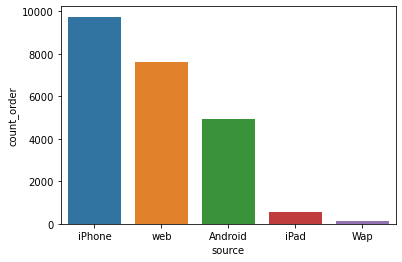

In [53]:
ax = sns.barplot(x="source", y="count_order", data=df_source)

In [ ]:
#График по количеству заказов на разных платформах

In [56]:
df_icon= df.icon.value_counts()
df_icon

executive    22737
group          239
easy           135
Name: icon, dtype: int64

In [ ]:
#Тип поездки еxecutive встречается чаще всего

C:\Users\andre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


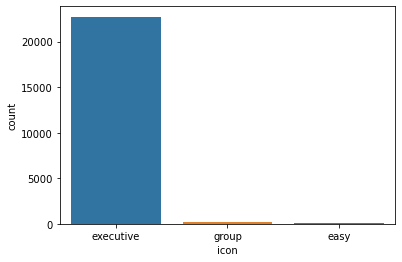

In [60]:
ax= sns.countplot(df.icon)

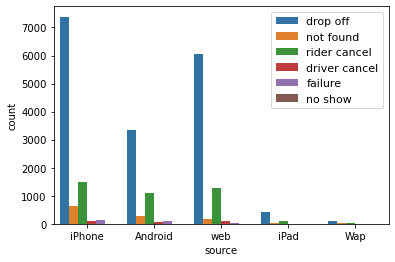

In [75]:
ax = sns.countplot(x="source", hue='end_state', data=df)
plt.legend( loc='upper right', fontsize=11, bbox_to_anchor=(1, 1))

In [ ]:
#Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone
#Больше всего заказов со статусом drop off совершено с платформы iPhone
#На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone

In [100]:
scores=df.driver_score.value_counts(normalize=True).mul(100).round(2)
scores

5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

In [101]:
scores=scores.reset_index()
scores

,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [102]:
scores=scores.rename(columns={'index':'driver_score', 'driver_score':'percentage'})
scores

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [106]:
driver_score_counts= scores.sort_values(['driver_score'])
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


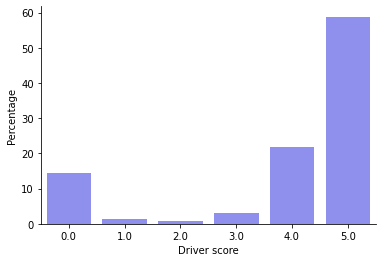

In [107]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [ ]:
#График оценки водителей

In [114]:
rid_score=df.rider_score.value_counts(normalize=True).mul(100).round(2)
rid_score=rid_score.reset_index()
rid_score.rename(columns={'index':'rider_score', 'rider_score':'percentage'}, inplace=True)
rid_score_counts=rid_score.sort_values(['rider_score'])
rid_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


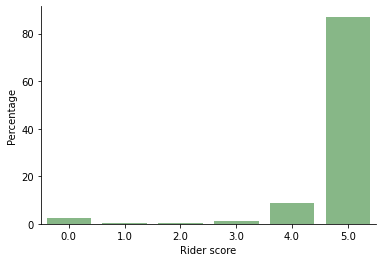

In [116]:
ax = sns.barplot(x='rider_score', y='percentage', data=rid_score_counts, color='green', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  
plt.show()

In [ ]:
#График оценки клиентов водителями